In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./spaceship-titanic/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
most_common_planet = df["HomePlanet"].value_counts().index[0]
df["HomePlanet"].replace(np.nan, most_common_planet, inplace=True)

In [28]:
most_common_cryostate = df["CryoSleep"].value_counts().index[0]
df["CryoSleep"].replace(np.nan, most_common_planet, inplace=True)

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [32]:
dfGraphing = df[["Cabin", "Transported"]]
dfGraphing["CabinRegion"] = dfGraphing["Cabin"].str.split("/").str[0]
grouped_cabin_data = dfGraphing.groupby(["CabinRegion", "Transported"]).size()
# sns.histplot()

C:\Users\Aman's Laptop\AppData\Local\Temp\ipykernel_6612\3536582469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGraphing["CabinRegion"] = dfGraphing["Cabin"].str.split("/").str[0]


In [48]:
grouped_cabin_data = grouped_cabin_data.reset_index()
grouped_cabin_data.head()

,CabinRegion,Transported,0
0,A,False,129
1,A,True,127
2,B,False,207
3,B,True,572
4,C,False,239


<Axes: xlabel='CabinRegion', ylabel='0'>

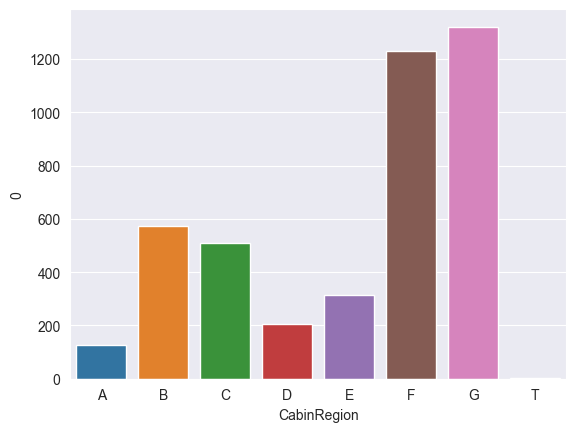

In [57]:
plottingHelper = grouped_cabin_data[grouped_cabin_data["Transported"] == True].value_counts().reset_index()
sns.barplot(x="CabinRegion", y=0, data=plottingHelper)

In [59]:
dfGraphing["Side"] = dfGraphing["Cabin"].str.split("/").str[-1]
dfGraphing.head()

C:\Users\Aman's Laptop\AppData\Local\Temp\ipykernel_6612\4101250196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGraphing["Side"] = dfGraphing["Cabin"].str.split("/").str[-1]


,Cabin,Transported,CabinRegion,Side
0,B/0/P,False,B,P
1,F/0/S,True,F,S
2,A/0/S,False,A,S
3,A/0/S,False,A,S
4,F/1/S,True,F,S


In [61]:
grouped_side = dfGraphing.groupby(["Side", "Transported"]).size()
grouped_side = grouped_side.reset_index()
grouped_side.head()

,Side,Transported,0
0,P,False,2308
1,P,True,1898
2,S,False,1908
3,S,True,2380


<Axes: xlabel='Side', ylabel='0'>

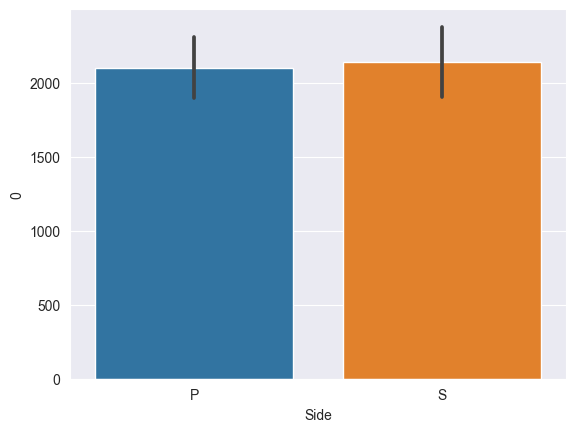

In [63]:
sns.barplot(x="Side", y=0, data=grouped_side)

In [64]:
df[["Deck", "CabinNumber", "Side"]] = df["Cabin"].str.split("/", expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNumber,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [65]:
df.drop(columns=["Cabin", "PassengerId", "Name"], inplace=True, axis=1)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [77]:
for i in range(5, 10):
    mean_val = df.iloc[:, i].mean()
    df.iloc[:, i].fillna(mean_val, inplace=True)

df.isna().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
CabinNumber     199
Side            199
dtype: int64

In [79]:
df.fillna(0, inplace=True)
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNumber     0
Side            0
dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Transported", axis=1), df["Transported"], test_size=0.2, random_state=4)

In [137]:
from sklearn.preprocessing import LabelEncoder
df["CryoSleep"] =df["CryoSleep"].astype(bool)
df["Destination"] =df["Destination"].astype(str)
df["Deck"] =df["Deck"].astype(str)
df["Side"] =df["Side"].astype(str)
label_encoder = LabelEncoder()
for column in X_train.columns.to_list():
    print(column)
    if df[column].dtype != "float64" and column != "CabinNumber":
        df[column] = label_encoder.fit_transform(df[column])

df.dtypes

HomePlanet
CryoSleep
Destination
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Deck
CabinNumber
Side


HomePlanet        int64
CryoSleep         int64
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck              int32
CabinNumber      object
Side              int32
dtype: object

In [136]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [92]:
df["Side"].value_counts()

Side
S    4288
P    4206
0     199
Name: count, dtype: int64

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
yPreds = tree.predict(X_test)
print(accuracy_score(y_test, yPreds))

0.7441058079355952


In [101]:
from sklearn.ensemble import RandomForestClassifier

forestAlpha = RandomForestClassifier()
forestAlpha.fit(X_train, y_train)
yPredsForest = forestAlpha.predict(X_test)
print(accuracy_score(y_test, yPredsForest))

0.7998849913743531


In [110]:
from xgboost import XGBClassifier

X_test_eval, X_test_norm, y_test_eval, y_test_norm = train_test_split(X_test, y_test, test_size=0.5, random_state=4)

X_train["CabinNumber"] = X_train["CabinNumber"].astype(int)
X_test_eval["CabinNumber"] = X_test_eval["CabinNumber"].astype(int)
X_test_norm["CabinNumber"] = X_test_norm["CabinNumber"].astype(int)

forestBeta = XGBClassifier(n_estimators = 500, learning_rate = 0.01,verbosity = 1)
forestBeta.fit(X_train,y_train, eval_set = [(X_test_eval,y_test_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.68895
[1]	validation_0-logloss:0.68483
[2]	validation_0-logloss:0.68080
[3]	validation_0-logloss:0.67684
[4]	validation_0-logloss:0.67297
[5]	validation_0-logloss:0.66918
[6]	validation_0-logloss:0.66545
[7]	validation_0-logloss:0.66180
[8]	validation_0-logloss:0.65821
[9]	validation_0-logloss:0.65479
[10]	validation_0-logloss:0.65142
[11]	validation_0-logloss:0.64811
[12]	validation_0-logloss:0.64482
[13]	validation_0-logloss:0.64163
[14]	validation_0-logloss:0.63844
[15]	validation_0-logloss:0.63538
[16]	validation_0-logloss:0.63238
[17]	validation_0-logloss:0.62936
[18]	validation_0-logloss:0.62642
[19]	validation_0-logloss:0.62355
[20]	validation_0-logloss:0.62070
[21]	validation_0-logloss:0.61790
[22]	validation_0-logloss:0.61516
[23]	validation_0-logloss:0.61251
[24]	validation_0-logloss:0.60987
[25]	validation_0-logloss:0.60721
[26]	validation_0-logloss:0.60467
[27]	validation_0-logloss:0.60212
[28]	validation_0-logloss:0.59968
[29]	validation_0-loglos

C:\Users\Aman's Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-logloss:0.55737
[49]	validation_0-logloss:0.55555
[50]	validation_0-logloss:0.55381
[51]	validation_0-logloss:0.55205
[52]	validation_0-logloss:0.55037
[53]	validation_0-logloss:0.54870
[54]	validation_0-logloss:0.54704
[55]	validation_0-logloss:0.54539
[56]	validation_0-logloss:0.54376
[57]	validation_0-logloss:0.54216
[58]	validation_0-logloss:0.54062
[59]	validation_0-logloss:0.53904
[60]	validation_0-logloss:0.53758
[61]	validation_0-logloss:0.53599
[62]	validation_0-logloss:0.53452
[63]	validation_0-logloss:0.53301
[64]	validation_0-logloss:0.53160
[65]	validation_0-logloss:0.53021
[66]	validation_0-logloss:0.52889
[67]	validation_0-logloss:0.52755
[68]	validation_0-logloss:0.52622
[69]	validation_0-logloss:0.52476
[70]	validation_0-logloss:0.52344
[71]	validation_0-logloss:0.52211
[72]	validation_0-logloss:0.52085
[73]	validation_0-logloss:0.51951
[74]	validation_0-logloss:0.51834
[75]	validation_0-logloss:0.51702
[76]	validation_0-logloss:0.51574
[77]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
yPredsForestBeta = forestBeta.predict(X_test_norm)
print(accuracy_score(y_test_norm, yPredsForestBeta))

0.8011494252873563


In [112]:
test_df = pd.read_csv("./spaceship-titanic/test.csv")


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [114]:

most_common_planet = test_df["HomePlanet"].value_counts().index[0]
test_df["HomePlanet"].replace(np.nan, most_common_planet, inplace=True)
most_common_cryostate = test_df["CryoSleep"].value_counts().index[0]
test_df["CryoSleep"].replace(np.nan, most_common_planet, inplace=True)

test_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [115]:
test_df[["Deck", "CabinNumber", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df.drop(columns=["Cabin", "PassengerId", "Name"], inplace=True, axis=1)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNumber,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [116]:
for i in range(5, 10):
    mean_val = test_df.iloc[:, i].mean()
    test_df.iloc[:, i].fillna(mean_val, inplace=True)
test_df.fillna(0, inplace=True)
test_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNumber     0
Side            0
dtype: int64

In [138]:
test_df["CryoSleep"] =test_df["CryoSleep"].astype(bool)
test_df["Destination"] =test_df["Destination"].astype(str)
test_df["Deck"] =test_df["Deck"].astype(str)
test_df["Side"] =test_df["Side"].astype(str)
for column in X_train.columns.to_list():
    print(column)
    if test_df[column].dtype != "float64" and column != "CabinNumber":
        test_df[column] = label_encoder.transform(test_df[column])

test_df.dtypes

HomePlanet


ValueError: y contains previously unseen labels: 0

In [118]:
test_df["CabinNumber"] = test_df["CabinNumber"].astype(int)
yPredsFinal = forestBeta.predict(test_df)


array([1, 0, 1, 1, 1])

In [134]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNumber,Side
0,0,1,3,27.0,0,0.0,0.0,0.0,0.0,0.0,7,3,2
1,0,0,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,6,4,2
2,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,3,0,2
3,1,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,3,1,2
4,0,0,3,20.0,0,10.0,0.0,635.0,0.0,0.0,6,5,2


In [ ]:
pd.read_csv()

In [119]:
Ids = pd.read_csv("./spaceship-titanic/test.csv")
Ids = Ids["PassengerId"]
Ids.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [121]:
df_new = pd.concat([Ids, pd.Series(yPreds)], axis =1)
df_new.head()

,PassengerId,0
0,0013_01,False
1,0018_01,True
2,0019_01,False
3,0021_01,True
4,0023_01,False


In [123]:
df_new.columns = ["PassengerId", "Transported"]
df_new.set_index("PassengerId", inplace = True)

In [132]:
df_new["Transported"].replace({False: True, True: False}, inplace = True)
df_new.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,True


In [133]:
df_new.to_csv("finalSubmission.csv")

In [128]:
df_new.size

4277

In [55]:
plottingHelper.reset_index()

,CabinRegion,Transported,0,count
0,A,True,127,1
1,B,True,572,1
2,C,True,508,1
3,D,True,207,1
4,E,True,313,1
5,F,True,1229,1
6,G,True,1321,1
7,T,True,1,1
